# 1. 경상남도_창원시_공장등록현황 파일을 읽어서 아래의 문제를 해결하는 코드를 작성하시오

(1) 창원시 각 구별로 분포하는 공장의 수를 계산하시오

(2) 전체 공장수에서 각 구별로 차지하는 비율을 계산하고 이를 시각화 하시오

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 지원되는걸로 교체

In [37]:
df = pd.read_csv("경상남도_창원시_공장등록현황_20210831.csv", encoding='UTF-8-SIG')
df

,순번,회사명,공장대표주소,업종명,생산품,전화번호,팩스번호
0,1,(사)한국장애인사회복지회사회복지부,경상남도 창원시 진해구 웅천동로 204 (성내동),구조용 금속 판제품 및 공작물 제조업 외 1 종,"울타리,난간",055-547-1438,30331301438
1,2,(윈펠)WINPELL,경상남도 창원시 성산구 연덕로27번길 60 (웅남동),전투용 차량 제조업,차륜형 장갑차 휠(림/디스크),055-271-7772,055-261-7774
2,3,(유)국제보링1급정비,경상남도 창원시 마산회원구 내서읍 중리공단로 149 (현대자동차서비스),자동차 구조 및 장치 변경업 외 1 종,자동차정비,055-232-4442,055-232-3663
3,4,(유)두루산업사,"경상남도 창원시 마산회원구 봉암공단9길 10 (봉암동, (유)두루산업사)",공기 조화장치 제조업 외 2 종,"생산품 가습기, 차아염소산수 제조장치",055-251-3040,055-251-4619
4,5,(유)리앤리테크,경상남도 창원시 성산구 반월로 16 (신촌동) 외 2필지,그 외 자동차용 신품 부품 제조업 외 3 종,자동차부품,055-603-3106,055-603-3114
...,...,...,...,...,...,...,...
4569,4570,희성테크,"경상남도 창원시 성산구 월림로67번길 5 (신촌동, 신촌동공장)",경 인쇄업 외 1 종,라벨류,055-286-8450,055-286-8453
4570,4571,히트케이(주),"경상남도 창원시 마산합포구 3·15대로 298, 504호(서성동, 경남대학교 창업보육관)",그 외 기타 전자부품 제조업,면상발열체 모듈,NaN,NaN
4571,4572,히팅플러스,"경상남도 창원시 성산구 완암로 50, 넥스동 7층 705 (성산동, SK테크노파크)",그 외 기타 금속가공업,금속 구조물,NaN,NaN
4572,4573,힐데갈드화장품,경상남도 창원시 의창구 차룡로48번길 44 (팔용동) 1동 5층 505호,화장품 제조업,천연화장품,055-822-8080,NaN


In [38]:
address = df['공장대표주소']
gu = ['성산구', '의창구', '마산합포구', '마산회원구', '진해구']
num_factory = np.zeros(5)
for x in range(5):
    tmp = address.str.contains(gu[x]).value_counts()
    num_factory[x] = tmp[1]
    
np.sum(num_factory)

4574.0

In [39]:
Number_Factory_Gu = pd.Series(num_factory, index=gu)
Number_Factory_Gu

성산구      1753.0
의창구      1252.0
마산합포구     395.0
마산회원구     890.0
진해구       284.0
dtype: float64

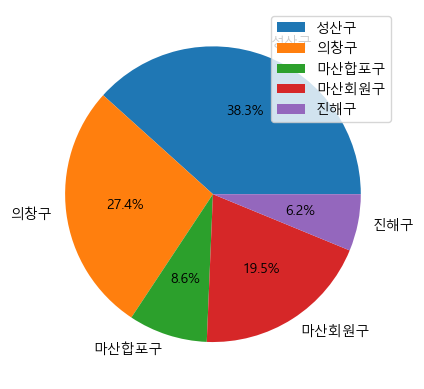

In [40]:
plt.pie(Number_Factory_Gu, autopct='%.1f%%', labels=gu)
plt.legend()
plt.show()

# 2. 서울일자리 센터 파일을 읽어서 아래의 문제를 해결하는 코드를 작성하시오

In [41]:
import chardet

In [42]:
filename = "서울일자리센터 인재정보 직종별, 지역별 목록.csv"
with open(filename, 'rb') as f:
    result = chardet.detect(f.readline())  
    print(result['encoding'])

EUC-KR


In [43]:
ddf = pd.read_csv("서울일자리센터 인재정보 직종별, 지역별 목록.csv", encoding = 'EUC-KR')
ddf.head()

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,...,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
0,H128202107071973,남,74,J00106,고등학교,서울,강북구,서울,NaN,814001,...,6년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,15:29.0,15:34.0
1,H309202107071965,남,87,J00100,관계없음,서울,강북구,NaN,NaN,561100,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,05:55.0,05:59.0
2,H110202107071953,여,68,J00100,관계없음,서울,서초구,서울,강남구,561101,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,57:27.0,57:30.0
3,H318202107071951,남,30,J00106,고등학교,서울,금천구,NaN,NaN,622301,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,51:30.0,51:33.0
4,H129202107071950,여,66,J00106,고등학교,서울,송파구,서울,NaN,561101,...,3년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,51:25.0,51:29.0


## (1)전체 구직자에서 남녀의 수와 비율을 계산하고, 이를 각각 시각화 하시오

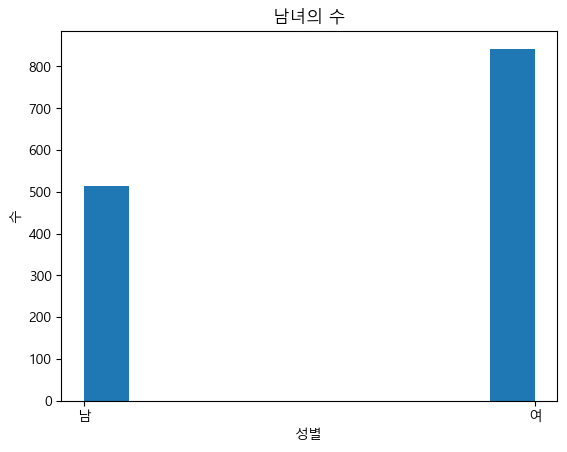

In [44]:
man = len(ddf.loc[ddf['성별'] == '남'])
girl = len(ddf.loc[ddf['성별'] == '여'])

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1)

axis.hist(ddf['성별'])
plt.title('남녀의 수')
plt.xlabel('성별')
plt.ylabel('수')
plt.show()

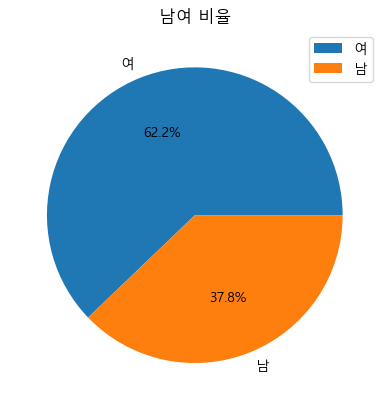

In [45]:
plt.title('남여 비율')
labels = ['여', '남']

plt.pie(ddf['성별'].value_counts(), autopct='%.1f%%', labels=labels)
plt.legend()
plt.show()

## (2)전체 구직자에서 10대에서 90대까지 연령별 숫자와 비율을 계산하고 시각화 하시오

In [46]:
ages = ddf['나이']
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
        
group_names = ['10대', '20대', '30대', '40대', '50대', '60대', '70대','80대', '90대']

cats = pd.cut(ages, bins, right=False, labels=group_names)
cats

0       70대
1       80대
2       60대
3       30대
4       60대
       ... 
1351    50대
1352    60대
1353    40대
1354    40대
1355    20대
Name: 나이, Length: 1356, dtype: category
Categories (9, object): ['10대' < '20대' < '30대' < '40대' ... '60대' < '70대' < '80대' < '90대']

In [47]:
cats2 = pd.value_counts(cats)
cats2
#cats2.sort_index()

60대    615
50대    332
70대    158
40대    105
20대     76
30대     58
10대      6
80대      6
90대      0
Name: 나이, dtype: int64

<Axes: title={'center': '연령별 숫자'}>

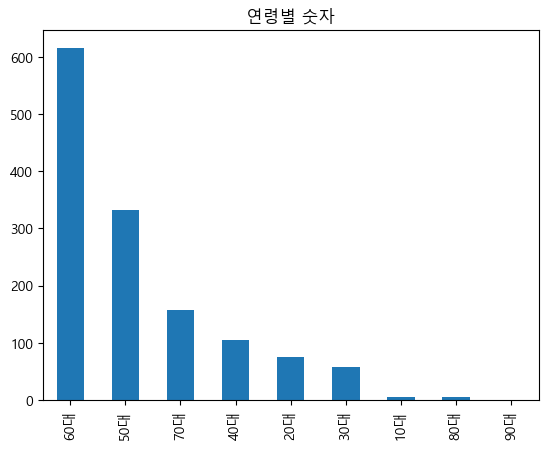

In [48]:
plt.title('연령별 숫자')
cats2.plot.bar()

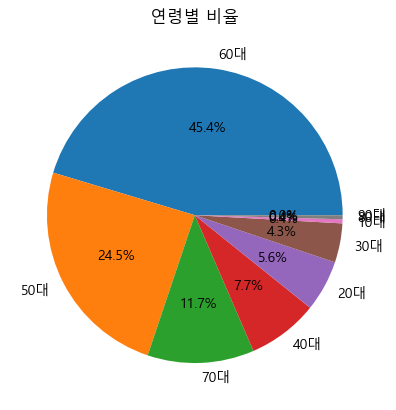

In [49]:
labels2 = ['60대', '50대', '70대', '40대', '20대', '30대', '10대','80대', '90대']

plt.title('연령별 비율')
plt.pie(cats2, labels=labels2, autopct='%1.1f%%')
plt.show()

## (3)A전자 인사과에서는 나이, 지역, 희망 직종 상관없이 학력이 고졸 이상이고, 60개월 이상의 경력직 구직자를 찾는다. 해당 구직자들을 찾아서 화면에 출력하시오

In [50]:
ddf = pd.read_csv("서울일자리센터 인재정보 직종별, 지역별 목록.csv", encoding = 'EUC-KR')
ddf.head()

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,...,희망직종경력년_월수,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시
0,H128202107071973,남,74,J00106,고등학교,서울,강북구,서울,NaN,814001,...,6년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,15:29.0,15:34.0
1,H309202107071965,남,87,J00100,관계없음,서울,강북구,NaN,NaN,561100,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,05:55.0,05:59.0
2,H110202107071953,여,68,J00100,관계없음,서울,서초구,서울,강남구,561101,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,57:27.0,57:30.0
3,H318202107071951,남,30,J00106,고등학교,서울,금천구,NaN,NaN,622301,...,신입,J03402,승인,NaN,NaN,NaN,NaN,NaN,51:30.0,51:33.0
4,H129202107071950,여,66,J00106,고등학교,서울,송파구,서울,NaN,561101,...,3년0월,J03402,승인,NaN,NaN,NaN,NaN,NaN,51:25.0,51:29.0


In [51]:
ddf['num'] = ddf['희망직종경력년수'] * 12 + ddf['희망직종경력개월수']

In [52]:
ddf['학력공통코드명'].unique()

array(['고등학교', '관계없음', '무학력', '대학_대학교', '중학교', '전문대학', '초등학교', '석사과정',
       '박사과정'], dtype=object)

In [53]:
ddf.drop(ddf[(ddf['학력공통코드명'] == '중학교') | (ddf['학력공통코드명'] == '초등학교') |
             (ddf['학력공통코드명'] == '관계없음') | (ddf['학력공통코드명'] == '무학력')].index, inplace=True)
# ddf.drop(ddf[(ddf['학력공통코드명'] == '중학교')].index, inplace=True)
# ddf.drop(ddf[(ddf['학력공통코드명'] == '초등학교')].index, inplace=True)

ddf[ddf.num>=60]

,구직신청번호,성별,나이,학력공통코드,학력공통코드명,희망근무지역(시도)_1,희망근무지역명(시군구)_1,희망근무지역명(시도)_2,희망근무지역명(시군구)_2,희망직종공통코드,...,구직인증상태공통구분,구직인증상태공통구분명,검색키워드1,검색키워드2,검색키워드3,검색키워드4,검색키워드5,등록일시,수정일시,num
0,H128202107071973,남,74,J00106,고등학교,서울,강북구,서울,NaN,814001,...,J03402,승인,NaN,NaN,NaN,NaN,NaN,15:29.0,15:34.0,72.0
9,H129202107071899,남,63,J00106,고등학교,서울,송파구,서울,강동구,561101,...,J03402,승인,NaN,NaN,NaN,NaN,NaN,33:48.0,33:52.0,120.0
15,H311202107071854,남,54,J00106,고등학교,서울,노원구,서울,NaN,562300,...,J03404,알선,NaN,NaN,NaN,NaN,NaN,15:31.0,15:36.0,120.0
21,H307202107071829,여,55,J00106,고등학교,서울,중랑구,서울,NaN,615100,...,J03404,알선,NaN,NaN,NaN,NaN,NaN,01:15.0,01:20.0,360.0
28,H001202107071787,남,46,J00110,대학_대학교,서울,NaN,대전,NaN,15100,...,J03402,승인,영화관,극장,매장운영,NaN,NaN,51:03.0,03:49.0,180.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1342,H001202104280192,남,56,J00108,전문대학,서울,중구,서울,전체,151109,...,J03402,승인,NaN,NaN,NaN,NaN,NaN,07:13.0,39:44.0,180.0
1345,H001202104231487,남,50,J00106,고등학교,서울,전체,경기,전체,622901,...,J03404,알선,태국어통역,자가용운전기사,태국어번역,태국직원,NaN,53:01.0,10:28.0,60.0
1349,H306202104131663,여,66,J00106,고등학교,서울,동대문구,서울,전체,616101,...,J03402,승인,NaN,NaN,NaN,NaN,NaN,48:36.0,10:21.0,120.0
1350,H324202104121333,남,60,J00108,전문대학,서울,송파구,서울,NaN,561102,...,J03404,알선,NaN,NaN,NaN,NaN,NaN,43:43.0,50:44.0,120.0
